# О проекте

Мы будем работать с датасетом, содержащим сведения о 40 000 ресторанах Европы, а модель, которую мы будем обучать, должна будет предсказывать рейтинг ресторана по данным сайта TripAdvisor на основе имеющихся в датасете данных.

Что я получу в результате работы?

•	создам свою первую модель, основанную на алгоритмах машинного обучения.
•	приму участие в соревновании на Kaggle.
•	опубликую решение на Kaggle, Github и в личном блоге или на других ресурсах, посвященных IT.

Чем я буду заниматься?

В этом модуле я попробую решить свой первый настоящий кейс и создам первую модель, использующую алгоритмы машинного обучения. 

Пока моя задача будет состоять, чтобы качественно подготовить данные для обучения модели. Нужна тщательная очистка данных и генерация новых признаков (Feature Engineering ), чтобы повысить точность модели в 2 и более раз. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
12952,id_10334,London,"['Fusion', 'Hawaiian']",10343.0,$$ - $$$,74.0,"[['Great taste of hawaii', 'Great'], ['12/11/2...",/Restaurant_Review-g186338-d7078652-Reviews-Po...,d7078652,1,3.5
34287,id_3364,Prague,"['American', 'Fast Food']",3371.0,NaN,9.0,"[['Love KFC', 'Love KFC'], ['07/11/2017', '03/...",/Restaurant_Review-g274707-d4768223-Reviews-KF...,d4768223,1,3.5
25572,id_1804,Barcelona,NaN,1805.0,NaN,70.0,"[['Nice restaurant for lunch', 'A very good mo...",/Restaurant_Review-g187497-d6704386-Reviews-Re...,d6704386,1,4.5
39448,id_2245,Amsterdam,"['Italian', 'American', 'Seafood', 'European']",2250.0,$$ - $$$,39.0,"[['Lunch was fabulous', 'They know how to pamp...",/Restaurant_Review-g188590-d7342967-Reviews-Am...,d7342967,1,4.0
4435,id_4435,Luxembourg,"['Fast Food', 'European', 'Healthy', 'Swedish'...",223.0,$$ - $$$,35.0,"[['Nordic snack', 'Excellent stop for snack & ...",/Restaurant_Review-g190356-d6654445-Reviews-Nj...,d6654445,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0 медианными значениями
data['Number of Reviews'].fillna(data['Number of Reviews'].median(), inplace=True)
data['Number of Reviews']

0          4.0
1         97.0
2         28.0
3        202.0
4        162.0
         ...  
49995     79.0
49996    542.0
49997      4.0
49998     70.0
49999    260.0
Name: Number of Reviews, Length: 50000, dtype: float64

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1573
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Посмотрим пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [20]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
30818,id_1192,"['French', 'European', 'Central European', 'In...",1194.0,$$$$,367.0,"[['Pity about the waitress', 'Sound'], ['11/19...",/Restaurant_Review-g187323-d3727880-Reviews-Gr...,d3727880,1,3.5,...,0,0,0,0,0,0,0,0,0,0
26031,id_825,"['Mediterranean', 'European', 'Spanish', 'Vege...",826.0,$$ - $$$,236.0,"[['Very good food and great cocktails', 'Very ...",/Restaurant_Review-g187514-d10400838-Reviews-M...,d10400838,1,4.0,...,0,0,0,0,0,0,0,0,0,0
8816,id_8816,"['Mediterranean', 'French']",931.0,$$ - $$$,12.0,"[['Wonderful New Years Eve Dinner', 'Tasty foo...",/Restaurant_Review-g188057-d7604755-Reviews-Le...,d7604755,0,0.0,...,0,0,0,0,0,0,0,0,0,0
49051,id_945,"['Dutch', 'European', 'Kosher']",948.0,$$ - $$$,59.0,"[['Awesome sandwiches', 'Good Food - Nice Staf...",/Restaurant_Review-g188590-d2732892-Reviews-Sa...,d2732892,1,4.5,...,0,0,0,0,0,0,0,0,0,0
17534,id_883,"['Cafe', 'Delicatessen', 'Healthy']",884.0,NaN,3.0,[['Good breakfast buffet as well as snack bef....,/Restaurant_Review-g189934-d5453767-Reviews-Fr...,d5453767,1,3.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  

In [23]:
#обработка 'Price Range'
price_dict = {'$': 10, '$$ - $$$': 100, '$$$$': 1000}
data['Price'] = data['Price Range'].map(price_dict)
#Пропуски заполняем медианным значением
data['Price'] = data['Price'].fillna(data['Price'].median())
#Убираем столбец 'Price Range'
data.drop(['Price Range',], axis = 1, inplace=True)
#Кодируем уровень цен в ресторанах 'Price'
data = pd.get_dummies(data, columns=[ 'Price',], dummy_na=True)
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,...,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price_10.0,Price_100.0,Price_1000.0,Price_nan
3076,id_3076,"['Middle Eastern', 'Persian']",13888.0,5.0,"[['good find', 'Worst restaurant ever. Avoid a...",/Restaurant_Review-g186338-d1044600-Reviews-Mi...,d1044600,0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
31954,id_353,"['Italian', 'Mediterranean', 'European', 'Pizz...",355.0,83.0,"[['Wonderful Pizza!', 'Business Meeting meetin...",/Restaurant_Review-g227102-d2084646-Reviews-Ri...,d2084646,1,4.0,0,...,0,0,0,0,1,0,0,1,0,0
48265,id_5273,"['Bar', 'Pub']",5275.0,4.0,"[[], []]",/Restaurant_Review-g187791-d4063481-Reviews-Vo...,d4063481,1,5.0,0,...,1,0,0,0,0,0,0,1,0,0
16390,id_4989,['Thai'],4991.0,33.0,[['Tasty Thai & Vietnamese food at affordable....,/Restaurant_Review-g187323-d5513568-Reviews-Ph...,d5513568,1,4.0,1,...,0,0,0,0,0,0,0,1,0,0
22378,id_6907,"['Japanese', 'Asian', 'Korean', 'Vegetarian Fr...",6916.0,43.0,[['Great Japanese food and love the Korean tw....,/Restaurant_Review-g186338-d5011155-Reviews-Ma...,d5011155,1,4.5,0,...,0,0,0,0,0,0,0,1,0,0


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели.

### Обработка других признаков 

In [24]:
# тут код на обработку других признаков
# Избавимся от NaN в признаке Cuisine Style местной кухней Local
data['Cuisine Style'] = data['Cuisine Style'].fillna('Local')
# Избавимся от NaN в признаке Number of Reviews. Заполним значения NaN -- 0
data['Number of Reviews'] = data['Number of Reviews'].fillna(0)

# Преобразуем данные признака Cuisine Style из str в list
# Функция, преобразующая строковые данные и строки Cuisine Style в данные типа список
def str_to_list(x):
    y = []
    a = ['Local']
    if x != 'Local':
        x = str(x[2:-2]).split('\', \'')
        for i in x:
            y.append(i)
        return y
    else:
        return a

data['Cuisine Style'] = data['Cuisine Style'].apply(str_to_list)

# Считаем кол-во кухонь в каждом ресторане
def count_of_cuisine(data):
    if type(data) == list:
        return len(data)
    
data['Count cuisines'] = data['Cuisine Style'].apply(count_of_cuisine)

data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price_10.0,Price_100.0,Price_1000.0,Price_nan,Count cuisines
12262,id_103,"[Mediterranean, Turkish, Delicatessen, Middle ...",105.0,96.0,"[['Made fresh to order', 'Great food & friendl...",/Restaurant_Review-g187309-d12514524-Reviews-O...,d12514524,1,4.5,0,...,0,0,0,0,0,1,0,0,0,7
27872,id_2203,[Spanish],2205.0,29.0,"[[], []]",/Restaurant_Review-g187514-d6439994-Reviews-Ca...,d6439994,1,4.5,0,...,0,0,0,0,0,0,1,0,0,1
44605,id_3783,"[Bar, Pub]",3785.0,8.0,"[[""If you're a whiskey lover here's the place....",/Restaurant_Review-g187323-d715487-Reviews-Mad...,d715487,1,4.5,0,...,0,0,0,0,0,0,1,0,0,2
602,id_602,[Spanish],7996.0,127.0,"[['Terrible terrible rice', 'Having dinner wit...",/Restaurant_Review-g187514-d2226705-Reviews-Re...,d2226705,0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
10460,id_482,"[French, Swiss, European]",485.0,12.0,"[[], []]",/Restaurant_Review-g188057-d10288341-Reviews-C...,d10288341,1,4.5,0,...,0,0,0,0,0,0,0,1,0,3


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

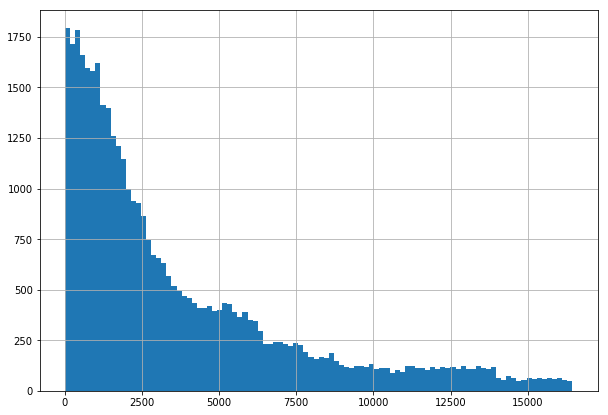

In [25]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

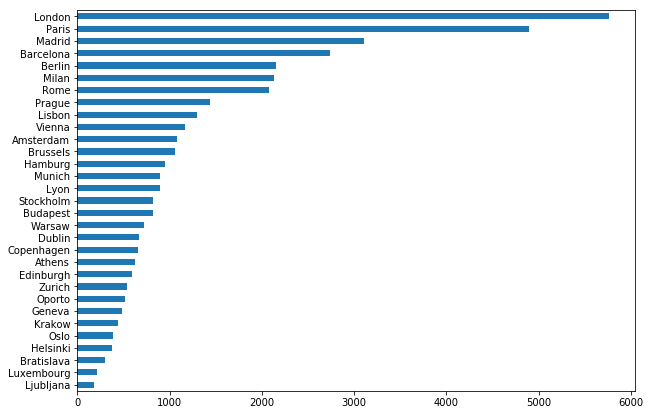

In [26]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

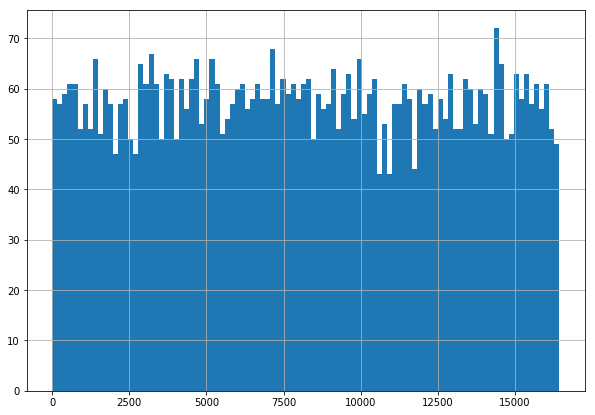

In [27]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

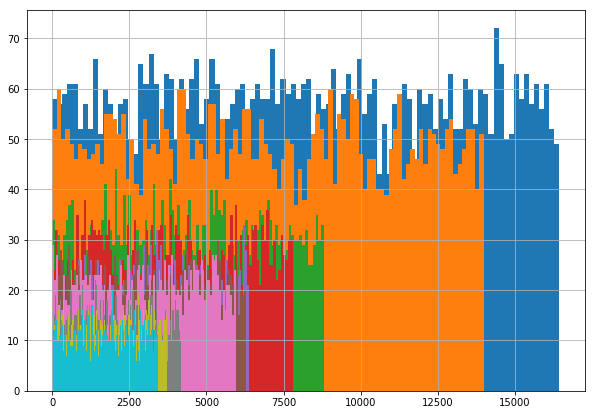

In [28]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение. 

### Посмотрим распределение целевой переменной

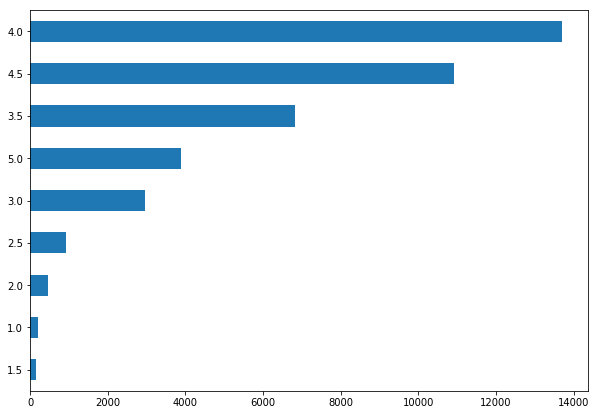

In [29]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

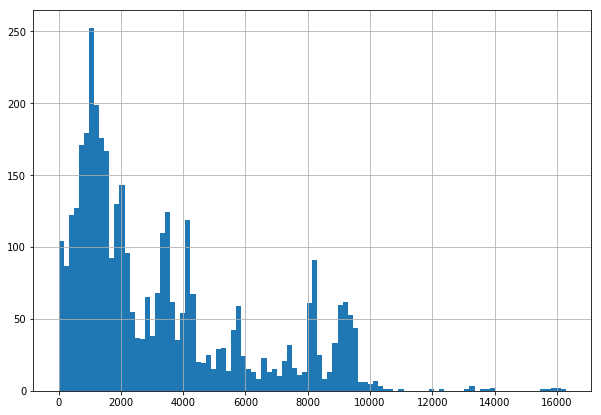

In [30]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

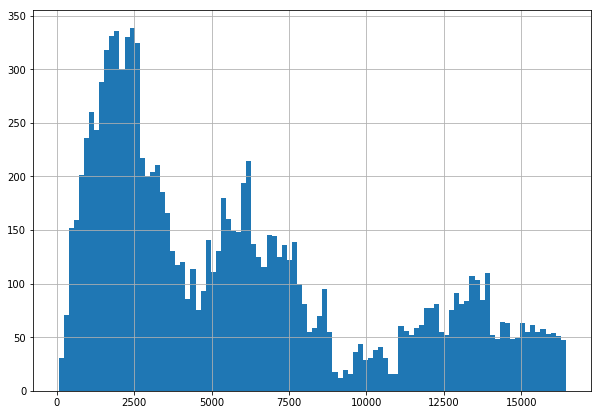

In [31]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас можно заметить, как признаки связаны между собой и с целевой переменной.

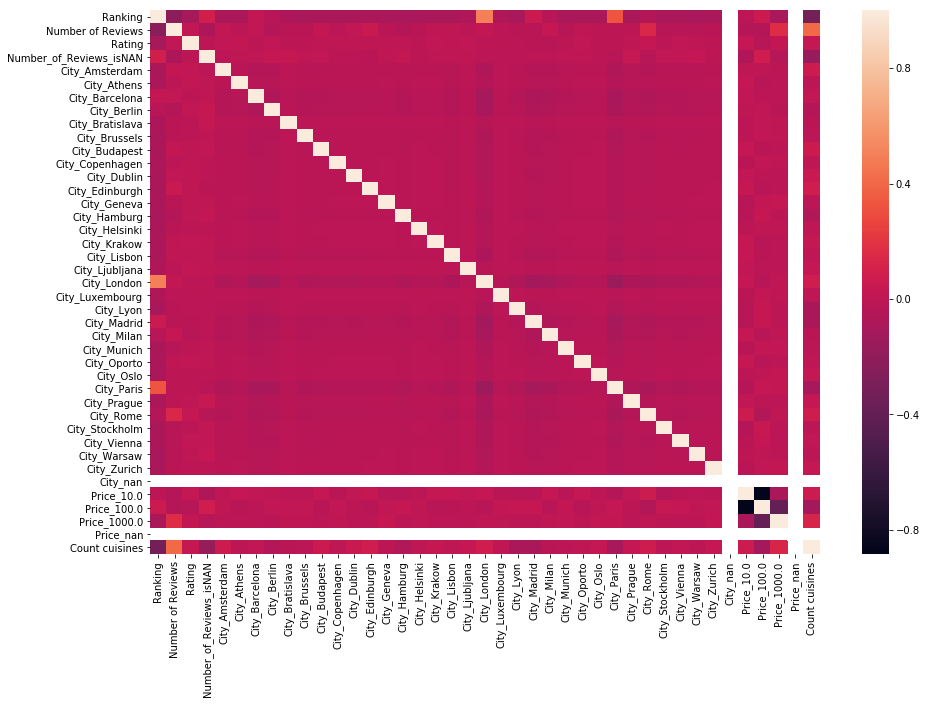

In [32]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [33]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [34]:
df_output = data.copy()
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем ненужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA', 'URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски средним
    df_output['Number of Reviews'].fillna(df_output['Number of Reviews'].mean(), inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут код не Encoding фитчей
    #обработка 'Price Range'
    price_dict = {'$': 10, '$$ - $$$': 100, '$$$$': 1000}
    df_output['Price'] = df_output['Price Range'].map(price_dict)
    #Пропуски заполняем медианным значением
    df_output['Price'] = df_output['Price'].fillna(df_output['Price'].median())
    #Убираем столбец 'Price Range'
    df_output.drop(['Price Range',], axis = 1, inplace=True)
    #Кодируем уровень цен в ресторанах 'Price'
    df_output = pd.get_dummies(df_output, columns=[ 'Price',], dummy_na=True)

    # ################### 4. Feature Engineering ####################################################
    # тут код на генерацию новых фитчей
    # Избавимся от NaN в признаке Cuisine Style местной кухней Local
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('Local')
    # Избавимся от NaN в признаке Number of Reviews. Заполним значения NaN -- 0
    df_output['Number of Reviews'] = df_output['Number of Reviews'].fillna(0)

    # Преобразуем данные признака Cuisine Style из str в list
    # Функция, преобразующая строковые данные и строки Cuisine Style в данные типа список
    def str_to_list(x):
        y = []
        a = ['Local']
        if x != 'Local':
            x = str(x[2:-2]).split('\', \'')
            for i in x:
                y.append(i)
            return y
        else:
            return a

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(str_to_list)

    # Считаем кол-во кухонь в каждом ресторане
    def count_of_cuisine(data):
        if type(data) == list:
            return len(data)
    
    df_output['Count cuisines'] = df_output['Cuisine Style'].apply(count_of_cuisine)

    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [35]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price_10.0,Price_100.0,Price_1000.0,Price_nan,Count cuisines
1062,4433.0,58.000000,0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4
38459,1478.0,182.000000,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
23868,2121.0,18.000000,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
43824,3439.0,124.471197,1,5.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,3
30564,2196.0,124.471197,1,3.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
23397,5400.0,180.000000,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
29726,556.0,29.000000,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
43963,9733.0,9.000000,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
46609,1157.0,23.000000,1,4.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
44242,387.0,40.000000,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5


In [36]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
Ranking              50000 non-null float64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
City_Amsterdam       50000 non-null uint8
City_Athens          50000 non-null uint8
City_Barcelona       50000 non-null uint8
City_Berlin          50000 non-null uint8
City_Bratislava      50000 non-null uint8
City_Brussels        50000 non-null uint8
City_Budapest        50000 non-null uint8
City_Copenhagen      50000 non-null uint8
City_Dublin          50000 non-null uint8
City_Edinburgh       50000 non-null uint8
City_Geneva          50000 non-null uint8
City_Hamburg         50000 non-null uint8
City_Helsinki        50000 non-null uint8
City_Krakow          50000 non-null uint8
City_Lisbon          50000 non-null uint8
City_Ljubljana       50000 non-null uint8
City_London          50000 non-null uint8
Cit

In [37]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [38]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [39]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 40), (40000, 40), (40000, 39), (32000, 39), (8000, 39))

# Model 
Сам ML

In [40]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [41]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [42]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [43]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2134375


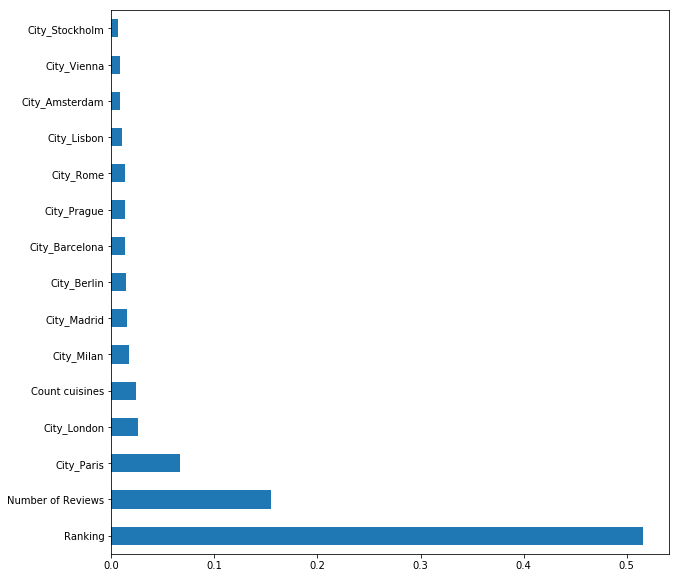

In [44]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [45]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price_10.0,Price_100.0,Price_1000.0,Price_nan,Count cuisines
6452,15635.0,15.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7263,1014.0,16.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5759,2969.0,34.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3587,1097.0,148.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4110,1476.0,7.0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,5
2365,2155.0,18.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2792,5921.0,3.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
144,1101.0,99.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,3
4774,2464.0,224.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
5343,13711.0,6.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [46]:
test_data = test_data.drop(['Rating'], axis=1)

In [47]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [48]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [49]:
predict_submission

array([2.995, 4.325, 4.53 , ..., 3.03 , 4.49 , 4.26 ])

In [50]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,2.995
1,id_1,4.325
2,id_2,4.530
3,id_3,4.170
4,id_4,4.450
5,id_5,4.610
6,id_6,1.930
7,id_7,2.515
8,id_8,4.145
9,id_9,4.735
